<h1>Extracting Stock Data Using a Python Library</h1>


In [2]:
#installing Python's yahoo-finance library
!pip install yfinance

Using legacy 'setup.py install' for yfinance, since package 'wheel' is not installed.
Using legacy 'setup.py install' for multitasking, since package 'wheel' is not installed.
    Running setup.py install for multitasking: started
    Running setup.py install for multitasking: finished with status 'done'
    Running setup.py install for yfinance: started
    Running setup.py install for yfinance: finished with status 'done'


In [3]:
import yfinance as yf 
import pandas as pd

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [5]:
apple = yf.Ticker("AAPL")

In [7]:
type(apple)

yfinance.ticker.Ticker

In [8]:
# Extracting stock info using info attribute
apple_info = apple.info

In [11]:
# Extracting the country
apple_info["country"]

'United States'

In [24]:
apple.info["sector"] # gives the sector to which the stock belongs

'Technology'

### Extracting Share Price


In [17]:
# using the history() function to extract share prices as a dataframe. Using the period parameter we can set how far back from 
# the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, 
# and max.
apple_share_price_data = apple.history(period="max")

In [13]:
apple_share_price_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100751,0.101189,0.100751,0.100751,469033600,0.0,0.0
1980-12-15,0.095933,0.095933,0.095495,0.095495,175884800,0.0,0.0
1980-12-16,0.088923,0.088923,0.088485,0.088485,105728000,0.0,0.0
1980-12-17,0.090676,0.091114,0.090676,0.090676,86441600,0.0,0.0
1980-12-18,0.093304,0.093742,0.093304,0.093304,73449600,0.0,0.0


In [18]:
apple_share_price_data.reset_index(inplace=True)
apple_share_price_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100751,0.101189,0.100751,0.100751,469033600,0.0,0.0
1,1980-12-15,0.095933,0.095933,0.095495,0.095495,175884800,0.0,0.0
2,1980-12-16,0.088923,0.088923,0.088485,0.088485,105728000,0.0,0.0
3,1980-12-17,0.090676,0.091114,0.090676,0.090676,86441600,0.0,0.0
4,1980-12-18,0.093304,0.093742,0.093304,0.093304,73449600,0.0,0.0


We can plot the `Open` price against the `Date`:


<AxesSubplot:xlabel='Date'>

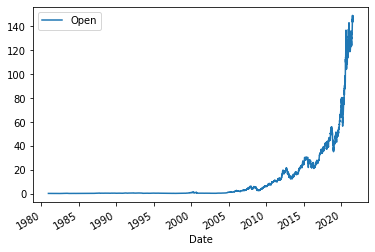

In [19]:
apple_share_price_data.plot(x="Date", y="Open")

In [25]:
# find the volume traded on the first day
apple_share_price_data["Volume"][0]

469033600

### Extracting Dividends


In [21]:
# Using the attribute dividends we can get a dataframe of the data. 
# The period of the data is given by the period defined in the 'history` function.
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-05-08    0.205000
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
Name: Dividends, Length: 71, dtype: float64

<AxesSubplot:xlabel='Date'>

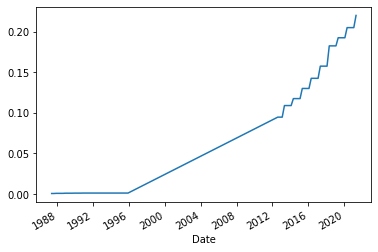

In [22]:
apple.dividends.plot()